Sources:

To download brazillian maps: https://dataficacao.wordpress.com/2017/02/21/criando-mapa-brasil-r/

To make the map beatiful: http://www.nickeubank.com/wp-content/uploads/2015/10/RGIS3_MakingMaps_part1_mappingVectorData.html


# 1. Imports
No elementaryOS 0.4.1. codenamed Loki, I had to install `gdal` by running `sudo apt-get install libgdal1-dev libproj-dev`

Download population data by municipality by running `wget ftp://ftp.ibge.gov.br/Estimativas_de_Populacao/Estimativas_2016/estimativa_TCU_2016_20170614.ods`

In [126]:
library(foreign)         # to read .dbf files
library(rgdal)           # to read .shp files
library(readODS)         # to read .ods files
library(RColorBrewer)    # color palettes
library(classInt)        # to make custom cuts

Loading required package: spData
To access larger datasets in this package, install the spDataLarge
package with: `install.packages('spDataLarge',
repos='https://nowosad.github.io/drat/', type='source'))`


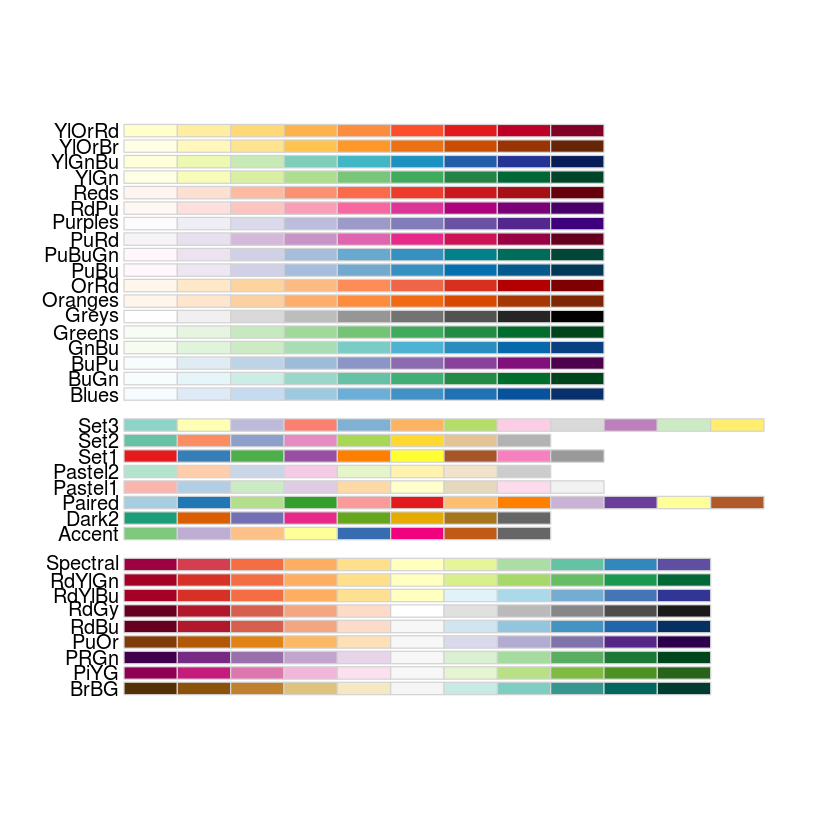

In [120]:
display.brewer.all()

# 2. Importing the data.frames

In [3]:
load('2018_04_28_data1_pesourbgradrend.RData')
dbf_data <- read.dbf('2018_04_28_data2_RDPR1509.dbf', as.is = FALSE)

In [4]:
ls()

[1] "dbf_data" "res"

In [5]:
print('Paraná:'); head(res$PR); print('Rio de Janeiro:'); head(res$RJ)

[1] "Paraná:"


mun,peso,urb,grad,rend,rendt
4100103,3.070993,1,NA,510,0
4100103,3.070993,1,NA,NA,510
4100103,3.070993,1,NA,NA,510
4100103,3.153293,1,NA,NA,1200
4100103,2.374362,1,NA,NA,NA
4100103,2.374362,1,NA,600,0


[1] "Rio de Janeiro:"


mun,peso,urb,grad,rend,rendt
3300100,10.72009,1,NA,NA,2200
3300100,10.72009,1,NA,NA,600
3300100,19.01061,2,NA,1000,0
3300100,19.01061,2,NA,NA,0
3300100,19.01061,2,NA,800,0
3300100,19.01061,2,NA,600,0


In [6]:
head(dbf_data)

UF_ZI,ANO_CMPT,MES_CMPT,ESPEC,CGC_HOSP,N_AIH,IDENT,CEP,MUNIC_RES,NASC,⋯,DIAGSEC9,TPDISEC1,TPDISEC2,TPDISEC3,TPDISEC4,TPDISEC5,TPDISEC6,TPDISEC7,TPDISEC8,TPDISEC9
410000,2015,09,03,04169712000190,4115108043563,1,86705667,410150,19430312,⋯,NA,0,0,0,0,0,0,0,0,0
410000,2015,09,03,04169712000190,4115108043574,1,86709546,410150,19620322,⋯,NA,0,0,0,0,0,0,0,0,0
410000,2015,09,03,04169712000190,4115108043585,1,86707440,410150,19920914,⋯,NA,1,0,0,0,0,0,0,0,0
410000,2015,09,03,04169712000190,4115108043596,1,86702765,410150,19410725,⋯,NA,0,0,0,0,0,0,0,0,0
410000,2015,09,03,04169712000190,4115108043607,1,86709290,410150,19400125,⋯,NA,0,0,0,0,0,0,0,0,0
410000,2015,09,03,04169712000190,4115108043618,1,86708080,410150,19560122,⋯,NA,0,0,0,0,0,0,0,0,0


# 3. Shape files

1. Go to the IBGE [website](https://downloads.ibge.gov.br/downloads_geociencias.htm)
2. "malhas territoriais" --> "malhas municipais" --> "municipio_2016" --> "UFs" --> Choose either "PR" or "RJ" --> Choose either "pr_municipio.zip" or "rj_municipio.zip". Or if you are on Linux, in the terminal simply run: `wget http://servicodados.ibge.gov.br/Download/Download.ashx?u=geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2016/UFs/RJ/rj_municipios.zip` to download the `.zip` to the `$HOME`

In [17]:
# shp <- readOGR("Mapa\\.", "BRUFE250GC_SIR", stringsAsFactors=FALSE, encoding="UTF-8")
# shp_rj <- readOGR('2018_04_28_rj.shp', stringsAsFactors=FALSE, encoding='UTF-8')
shp_rj <- readOGR('shape', '33MUE250GC_SIR')

OGR data source with driver: ESRI Shapefile 
Source: "/home/jayme/dsbd/progamming_languages_for_data_science/shape", layer: "33MUE250GC_SIR"
with 92 features
It has 2 fields


In [18]:
head(shp_rj)

An object of class "SpatialPolygonsDataFrame"
Slot "data":
          NM_MUNICIP CD_GEOCMU
0     ANGRA DOS REIS   3300100
1            APERIBÉ   3300159
2           ARARUAMA   3300209
3              AREAL   3300225
4 ARMAÇÃO DOS BÚZIOS   3300233
5    ARRAIAL DO CABO   3300258

Slot "polygons":
[[1]]
An object of class "Polygons"
Slot "Polygons":
[[1]]
An object of class "Polygon"
Slot "labpt":
[1] -44.35868 -23.21364

Slot "area":
[1] 8.418143e-06

Slot "hole":
[1] FALSE

Slot "ringDir":
[1] 1

Slot "coords":
           [,1]      [,2]
 [1,] -44.35695 -23.21239
 [2,] -44.35648 -23.21266
 [3,] -44.35641 -23.21341
 [4,] -44.35688 -23.21381
 [5,] -44.35780 -23.21456
 [6,] -44.35855 -23.21463
 [7,] -44.35922 -23.21498
 [8,] -44.35970 -23.21503
 [9,] -44.36042 -23.21503
[10,] -44.36107 -23.21453
[11,] -44.36054 -23.21366
[12,] -44.36002 -23.21306
[13,] -44.35945 -23.21257
[14,] -44.35890 -23.21242
[15,] -44.35860 -23.21259
[16,] -44.35823 -23.21254
[17,] -44.35805 -23.21237
[18,] -44.35785 -2

In [ ]:
merge(x, y, by = intersect(names(x), names(y)),
      by.x = by, by.y = by, all = FALSE, all.x = all, all.y = all,
      sort = TRUE, suffixes = c(".x",".y"), no.dups = TRUE,
      incomparables = NULL, ...)

In [102]:
pop2016 <- read.csv('pop2016.csv', colClasses = c('COD_MUNIC' = 'character'))

pop2016$POPULACAO_ESTIMADA <- gsub('[(\1)]', '', pop2016$POPULACAO_ESTIMADA)
pop2016$POPULACAO_ESTIMADA <- gsub('[(\2)]', '', pop2016$POPULACAO_ESTIMADA)
pop2016$POPULACAO_ESTIMADA <- gsub('[(\3)]', '', pop2016$POPULACAO_ESTIMADA)
pop2016$POPULACAO_ESTIMADA <- gsub('[(\4)]', '', pop2016$POPULACAO_ESTIMADA)

pop2016$CD_GEOCMU <- as.integer(paste(pop2016$COD_UF, pop2016$COD_MUNIC, sep = ''))

head(pop2016)

UF,COD_UF,COD_MUNIC,NOME_DO_MUNICIPIO,POPULACAO_ESTIMADA,CD_GEOCMU
RO,11,00015,Alta Floresta D'Oeste,25506,1100015
RO,11,00023,Ariquemes,105896,1100023
RO,11,00031,Cabixi,6289,1100031
RO,11,00049,Cacoal,87877,1100049
RO,11,00056,Cerejeiras,17959,1100056
RO,11,00064,Colorado do Oeste,18639,1100064


In [104]:
# df <- merge(x = pop2016, y = shp_rj, by.x = 'COD_MUNIC', by.y = 'CD_GEOCMU')
df <- merge(x = pop2016, y = shp_rj, by= 'CD_GEOCMU')

In [105]:
head(df)

CD_GEOCMU,UF,COD_UF,COD_MUNIC,NOME_DO_MUNICIPIO,POPULACAO_ESTIMADA,NM_MUNICIP
3300100,RJ,33,00100,Angra dos Reis,191504,ANGRA DOS REIS
3300159,RJ,33,00159,Aperibé,11160,APERIBÉ
3300209,RJ,33,00209,Araruama,124940,ARARUAMA
3300225,RJ,33,00225,Areal,12058,AREAL
3300233,RJ,33,00233,Armação dos Búzios,31674,ARMAÇÃO DOS BÚZIOS
3300258,RJ,33,00258,Arraial do Cabo,29077,ARRAIAL DO CABO


In [111]:
shp_rj$POPULACAO_ESTIMADA <- as.integer(df$POPULACAO_ESTIMADA)

In [166]:
n = 9

In [167]:
my.palette <- brewer.pal(n = n, name = "OrRd")

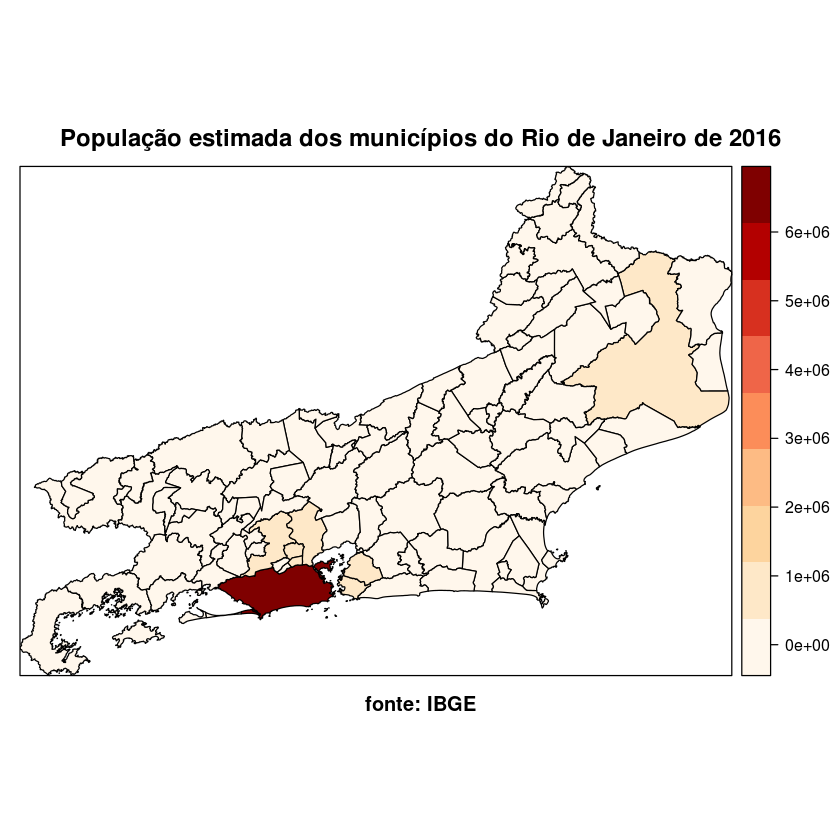

In [168]:
spplot(
    shp_rj,
    'POPULACAO_ESTIMADA',
    main = 'População estimada dos municípios do Rio de Janeiro de 2016',
    sub = 'fonte: IBGE',
    col.regions = my.palette, cuts = n - 1)

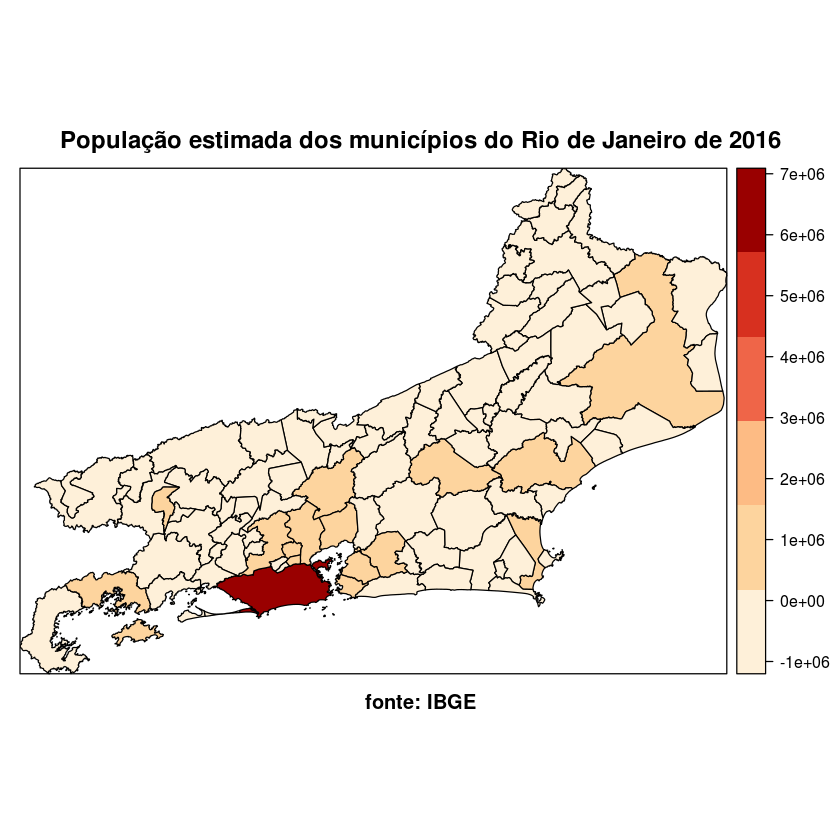

In [217]:
n = 7

my.palette <- brewer.pal(n = n, name = "OrRd")

breaks.qt <- classIntervals(shp_rj$POPULACAO_ESTIMADA, n = n - 1, style = 'sd', intervalClosure = 'right')

spplot(
    shp_rj,
    'POPULACAO_ESTIMADA',
    main = 'População estimada dos municípios do Rio de Janeiro de 2016',
    sub = 'fonte: IBGE',
#     col = 'transparent',
    col.regions = my.palette,
    at = breaks.qt$brks)